In [ ]:
# Apply pre-processing steps from the Edge Detection notebook then run the Hough Line Transform
# Based on https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

In [2]:
# Basic Setup
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
from io import BytesIO
import PIL.Image
import math

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

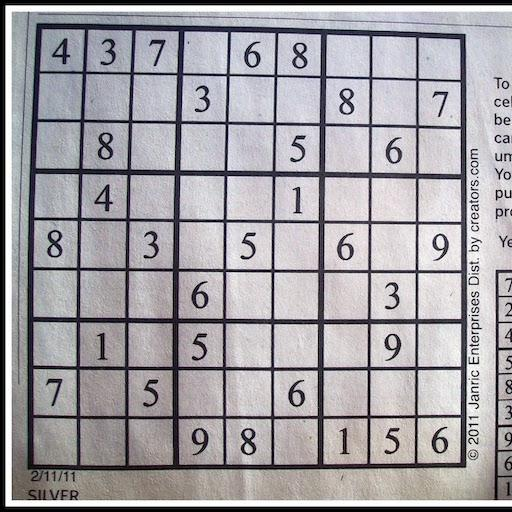

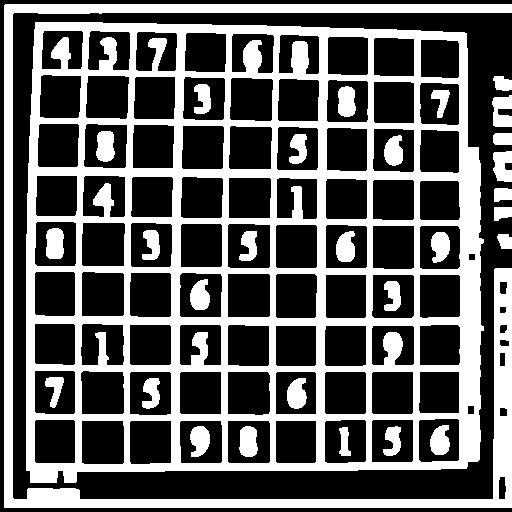

In [3]:
# Edge Detection Pre-Processing

img = cv2.imread("newspaper2.jpg")
showarray(img)
downsampled = cv2.pyrDown(img, dstsize=(img.shape[0]//2, img.shape[1]//2))
downsampled = cv2.pyrUp(downsampled, dstsize=(downsampled.shape[0]*2, downsampled.shape[1]*2))
blur = cv2.GaussianBlur(img,(5,5),0)
edges = cv2.Canny(blur,100,200)
dilate_kernel = np.ones((3,3),np.uint8)
erode_kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(edges, dilate_kernel, iterations=3)
erode = cv2.erode(dilate, dilate_kernel, iterations=2)
showarray(erode)

dst = erode

[[[  9 507   9   4]]

 [[ 77 471  85  22]]

 [[ 29 470  36  22]]

 ...

 [[128 163 128 139]]

 [[224 118 224 102]]

 [[420  81 434  82]]]


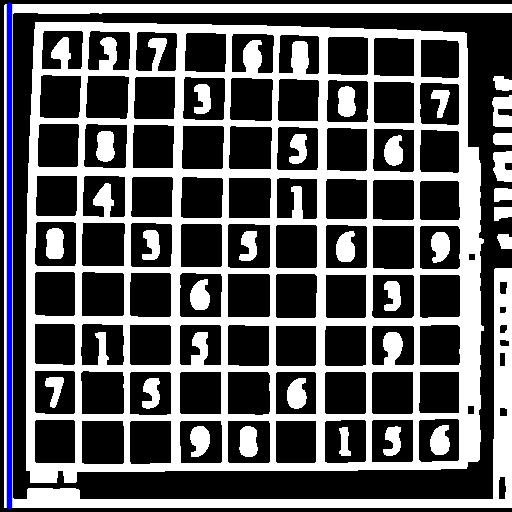

In [7]:
# Run the Houghes transform

# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

minLineLength = 100
maxLineGap = 10

lines = cv2.HoughLinesP(dst, 1, np.pi / 180, 100, minLineLength,maxLineGap)

print(lines)

if lines is not None:
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(cdst, (x1,y1),(x2,y2), (0,0,255), 3, cv2.LINE_AA)
        
showarray(cdst)